In [1]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import readability
import numpy as np

In [3]:
import cloudpickle
disease_lookup = cloudpickle.load(open("disease_lookup.pkl", "rb" ) )
disease_list = cloudpickle.load(open("disease_list.pkl", "rb" ) )
df = cloudpickle.load(open("cleaned_forum_data.pkl", "rb" ) )

In [4]:
posts=df.shape[0]
convos=df['post'].unique().shape[0]
print "Forum dataset consists of %s posts across %s conversations" % (posts,convos)

Forum dataset consists of 149183 posts across 63846 conversations


In [5]:
df.groupby('response_type').count()['post']

,Unnamed: 0,post,response,response_time,subject,user_name,user_profile
response_type,,,,,,,
asker,65787,65787,65787,65787,65787,65787,65787
doctor,52642,52642,52642,52642,52642,52642,52642
other,30448,30448,30448,30441,30448,30441,30448
staff,306,306,306,306,306,306,306


In [ ]:
sns.distplot(df_crop['askergrd'],400)
sns.distplot(df_crop['doctorgrd'],100)
plt.xlim(0, 50)
plt.xlabel('Flesch Kincaid Grade Level')

In [ ]:
g = sns.jointplot(x='askergrd', y='doctorgrd', data=df_crop, kind="kde", color="m")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker=".")
g.ax_joint.collections[0].set_alpha(0)

In [43]:
labeled = 1-df.groupby('subject')['response'].count()[['nevermind','stds']].sum()/float(len(df))
print "%s labeled by subject " % labeled

0.129719874248 labeled by subject 


In [5]:
df=df.loc[df['response_time']!='ignored',:]
df=df.loc[df['response_time']!='ignore',:]
df['response_time']=df['response_time'].str.replace('replied ','').str.strip()
df['response_time']=pd.to_datetime(df['response_time'])

In [6]:
#just lists to turn into a new dataframe (this is quicker than append)
# sure I could figure out a groupby post then sortby response_type

timing=[]

for i,post in enumerate(df['post'].unique()):
    if(i%1000==0):
        print i
    tm_ask = df.loc[(df['post']==post) & (df['response_type']=='asker'),'response_time'].values
    tm_doc = df.loc[(df['post']==post) & (df['response_type']=='doctor'),'response_time'].values
    if(len(tm_ask)>0 and len(tm_doc)>0):
        x=(tm_doc[0]-tm_ask[0])
        days = x.astype('timedelta64[D]')
        timing.append(days / np.timedelta64(1, 'D'))
delays=np.array(timing)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000


In [7]:
print "The mean time for a doctor response on the health forums was %s days." % delays.mean()

The mean time for a doctor response on the health forums was 4.51026295087 days.


(0, 50)

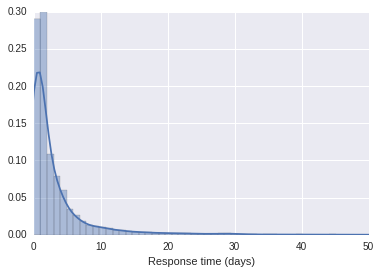

In [26]:
sns.distplot(delays[ (delays<50)],50,kde_kws={'bw':1})
plt.xlabel('Response time (days)')
plt.xlim([0,50])